In [1]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, AveragePooling2D,Dropout
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import cv2
from sklearn.utils import shuffle
import PIL
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense
from tensorflow.keras import Model

In [2]:
BATCH_SIZE = 64
IMG_HEIGHT = 180
IMG_WIDTH = 180
VAL_SPLIT = 0.2
SEED = 157
LABELS = 'binary'
DATA_PATH = '/kaggle/input/cat-vs-dogs'
animals = list(os.walk('/kaggle/input/cat-vs-dogs'))

In [3]:
label_names = animals[0][1]
dict_labels = dict(zip(label_names, list(range(len(label_names)))))
print(dict_labels)

{'dog': 0, 'cat': 1}


In [4]:
def dataset(path):
    images = []
    labels = []
    for folder in tqdm(os.listdir(path)):
        value_of_label = dict_labels[folder] 

        for file in (os.listdir(os.path.join(path, folder, folder))):
            path_of_file = os.path.join(os.path.join(path, folder, folder), file)
            # print(path_of_file)
            image = cv2.imread(path_of_file)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH))
            images.append(image)
            labels.append(value_of_label)

    images = np.array(images, dtype = 'float32')/255.0
    labels = np.array(labels)

    return images, labels

images, labels = dataset(DATA_PATH)
images, labels = shuffle(images, labels)
images.shape

100%|██████████| 2/2 [00:31<00:00, 15.74s/it]


(5364, 180, 180, 3)

In [5]:
size = len(images)
point = int(size*(1-VAL_SPLIT))
train_image = images[0:point+1]
train_label = labels[0:point+1]
val_image = images[point+1:size]
val_label = labels[point+1:size]
print(len(train_image) )
print(len(val_image) )

4292
1072


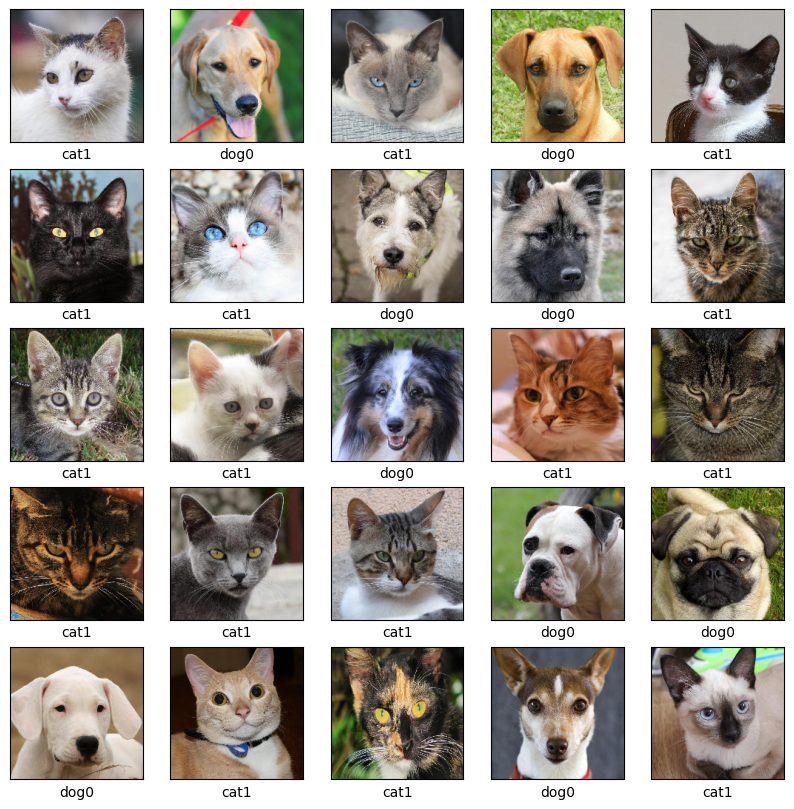

In [6]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.grid(False)
    data = images[i]
    plt.xlabel(str(label_names[labels[i]] + str(labels[i])))
    plt.imshow(data);

In [7]:
PetNet=Sequential()
PetNet.add(Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)))

# 1st Conv Block
PetNet.add(Conv2D(filters =64, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(Conv2D(filters =64, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(MaxPool2D(pool_size = 2, strides = 2, padding ='same'))       

# # 2nd Conv Block
PetNet.add(Conv2D(filters =128, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(Conv2D(filters =128, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(MaxPool2D(pool_size =2, strides =2, padding ='same'))

# # 3rd Conv block
PetNet.add(tf.keras.layers.BatchNormalization())
PetNet.add(Conv2D(filters =256, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(Conv2D(filters =256, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(Conv2D(filters =256, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(tf.keras.layers.Dropout(0.3))
PetNet.add(MaxPool2D(pool_size =2, strides =2, padding ='same'))

# # 4th Conv block
PetNet.add(tf.keras.layers.BatchNormalization())
PetNet.add(Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(tf.keras.layers.BatchNormalization())
PetNet.add(Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(tf.keras.layers.BatchNormalization())
PetNet.add(tf.keras.layers.Dropout(0.3))
PetNet.add(MaxPool2D(pool_size =2, strides =2, padding ='same'))

# # 5th Conv block
PetNet.add(tf.keras.layers.BatchNormalization())
PetNet.add(Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(tf.keras.layers.BatchNormalization())
PetNet.add(Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(tf.keras.layers.BatchNormalization())
PetNet.add(tf.keras.layers.Dropout(0.3))
PetNet.add(MaxPool2D(pool_size =2, strides =2, padding ='same'))

# # Fully connected layers
PetNet.add(tf.keras.layers.BatchNormalization())
PetNet.add(tf.keras.layers.Dropout(0.3))
PetNet.add(Flatten()) 
PetNet.add(Dense(units = 128, activation ='relu'))
PetNet.add(tf.keras.layers.Dropout(0.3))
PetNet.add(Dense(units = 64, activation ='relu'))


PetNet.add(Dense(units = 1, activation ='sigmoid'))
PetNet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 45, 45, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 45, 45, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 23, 23, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 23, 23, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 23, 23, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 23, 23, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 23, 23, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 23, 23, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 17,096,257 (65.22 MB)

 Trainable params: 17,089,345 (65.19 MB)

 Non-trainable params: 6,912 (27.00 KB)

In [8]:
PetNet.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [9]:
history = PetNet.fit(train_image, train_label, epochs=32, validation_data=(val_image, val_label))

Epoch 1/32


I0000 00:00:1733557475.090038      76 service.cc:145] XLA service 0x7a6b74015270 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733557475.090123      76 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733557475.090130      76 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1733557513.101966      76 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


135/135 ━━━━━━━━━━━━━━━━━━━━ 112s 504ms/step - accuracy: 0.6400 - loss: 0.9497 - val_accuracy: 0.5560 - val_loss: 0.8783
Epoch 2/32
135/135 ━━━━━━━━━━━━━━━━━━━━ 45s 333ms/step - accuracy: 0.7877 - loss: 0.5214 - val_accuracy: 0.7743 - val_loss: 0.8834
Epoch 3/32
135/135 ━━━━━━━━━━━━━━━━━━━━ 44s 327ms/step - accuracy: 0.8505 - loss: 0.3939 - val_accuracy: 0.7146 - val_loss: 0.9843
Epoch 4/32
135/135 ━━━━━━━━━━━━━━━━━━━━ 45s 331ms/step - accuracy: 0.9178 - loss: 0.2245 - val_accuracy: 0.4991 - val_loss: 1.6425
Epoch 5/32
135/135 ━━━━━━━━━━━━━━━━━━━━ 44s 327ms/step - accuracy: 0.9186 - loss: 0.2091 - val_accuracy: 0.8909 - val_loss: 0.2655
Epoch 6/32
135/135 ━━━━━━━━━━━━━━━━━━━━ 44s 328ms/step - accuracy: 0.9577 - loss: 0.1191 - val_accuracy: 0.6017 - val_loss: 1.6841
Epoch 7/32
135/135 ━━━━━━━━━━━━━━━━━━━━ 44s 330ms/step - accuracy: 0.9622 - loss: 0.1254 - val_accuracy: 0.9701 - val_loss: 0.0751
Epoch 8/32
135/135 ━━━━━━━━━━━━━━━━━━━━ 44s 328ms/step - accuracy: 0.9734 - loss: 0.0727 - va

In [10]:
PetNet.save('PetNet.h5')

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step


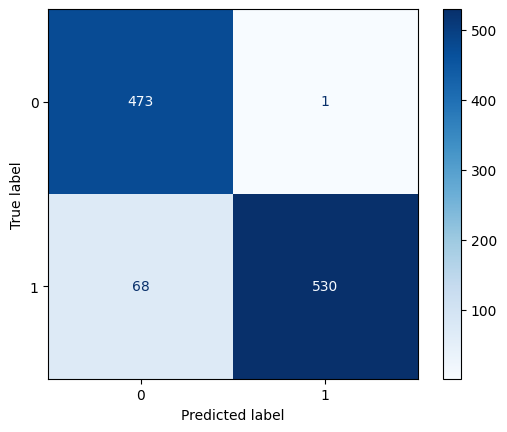

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = PetNet.predict(val_image) >= 0.5
cm = confusion_matrix(y_pred, val_label)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")

168/168 ━━━━━━━━━━━━━━━━━━━━ 26s 154ms/step


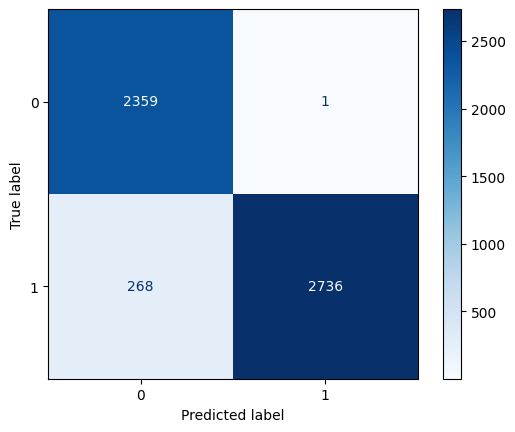

In [12]:
y_pred = PetNet.predict(images) >= 0.5
cm = confusion_matrix(y_pred, labels)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")

In [13]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

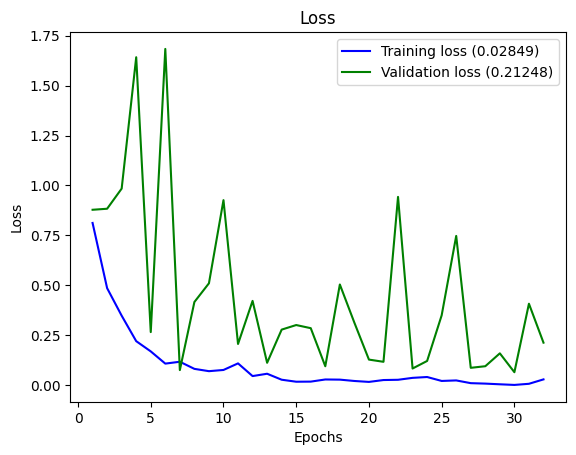

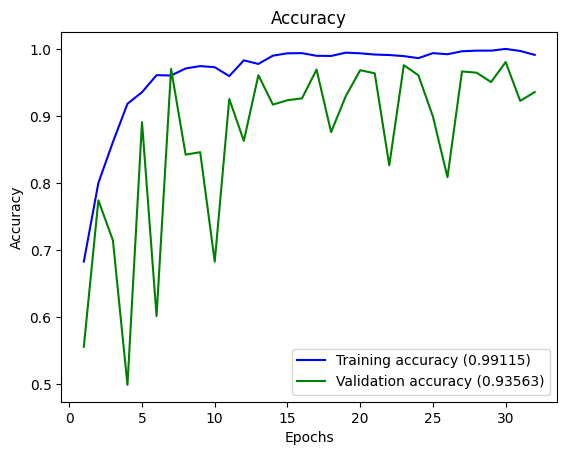

In [14]:
plot_history(history)